In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#Loading the MNIST dataset from Keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
#looking on the sample of images [pixel]
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

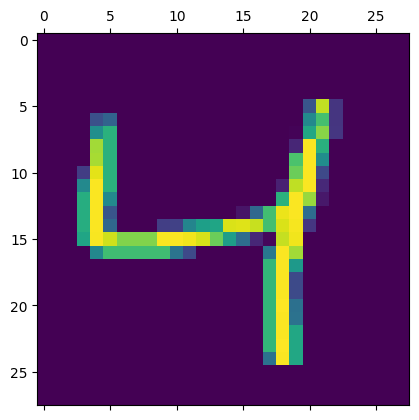

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
X_train.shape
X_train = X_train/255
X_test = X_test/255

In [9]:
#now converting a two-dimensional array into one dimensional array for that we will use reshape function
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4646 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.9261


[0.2660307288169861, 0.9261000156402588]

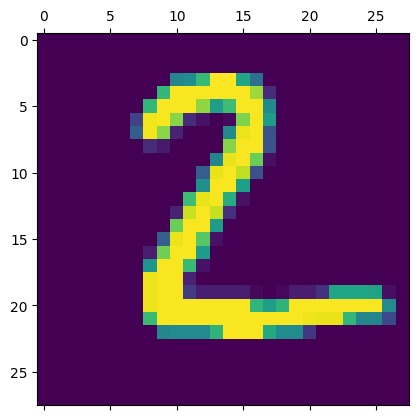

In [12]:
plt.matshow(X_test[1])

In [13]:
y_predict = model.predict(X_test_flattened)
y_predict[1]

313/313 [==============================] - 0s 1ms/step


array([3.1482199e-01, 5.7213265e-03, 9.9950570e-01, 4.9203482e-01,
       6.8812428e-10, 8.6895162e-01, 9.5706177e-01, 7.4286031e-13,
       1.6178714e-01, 3.6500605e-09], dtype=float32)

In [14]:
#lets test our model
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    2,    0,    7,   11,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  924,   19,    6,    4,   13,    9,   40,    5],
       [   1,    0,   18,  932,    1,   17,    3,    8,   22,    8],
       [   1,    1,    4,    2,  910,    0,   10,    4,   10,   40],
       [   7,    3,    4,   44,    8,  766,   17,    4,   32,    7],
       [   7,    3,    5,    1,    7,    9,  921,    2,    3,    0],
       [   1,    5,   23,    9,    7,    1,    0,  939,    3,   40],
       [   3,    7,    6,   25,    9,   24,    9,    8,  876,    7],
       [   7,    7,    2,   12,   26,    5,    0,   13,    8,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

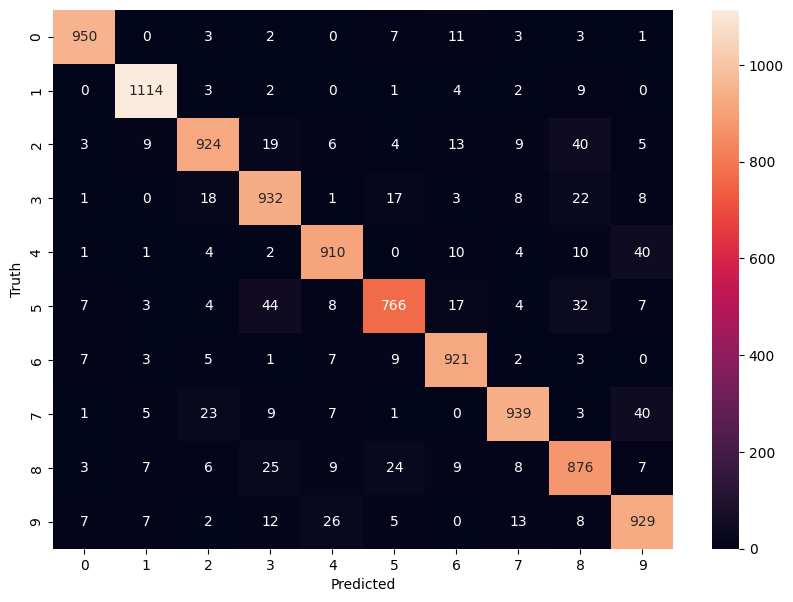

In [16]:
#now lets plot the confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [17]:
#converting keras model into the TF lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = converter.convert()

f = open('Deep_Learning_1','wb')
f.close()

In [19]:
try:
  from google.colab import files
  files.download('Deep_Learning_1')
except ImportError:
  import os
  print('TF Lite Model: ', os.path.join(os.getcwd(),'Deep_learning_1'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>